In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data

In [2]:
import pandas as pd

# Define file paths
oil_data_path = "/kaggle/input/store-sales-time-series-forecasting/oil.csv"
sample_submission_path = "/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv"
holidays_events_path = "/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv"
stores_data_path = "/kaggle/input/store-sales-time-series-forecasting/stores.csv"
train_data_path = "/kaggle/input/store-sales-time-series-forecasting/train.csv"
test_data_path = "/kaggle/input/store-sales-time-series-forecasting/test.csv"
transactions_data_path = "/kaggle/input/store-sales-time-series-forecasting/transactions.csv"

# Load datasets
oil_data = pd.read_csv(oil_data_path)
sample_submission = pd.read_csv(sample_submission_path)
holidays_events = pd.read_csv(holidays_events_path)
stores_data = pd.read_csv(stores_data_path)
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
transactions_data = pd.read_csv(transactions_data_path)

# Print shapes with dataset names
print("Dataset Shapes:")
print(f"Oil Data Shape: {oil_data.shape}")
print(f"Sample Submission Shape: {sample_submission.shape}")
print(f"Holidays & Events Shape: {holidays_events.shape}")
print(f"Stores Data Shape: {stores_data.shape}")
print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")
print(f"Transactions Data Shape: {transactions_data.shape}")

Dataset Shapes:
Oil Data Shape: (1218, 2)
Sample Submission Shape: (28512, 2)
Holidays & Events Shape: (350, 6)
Stores Data Shape: (54, 5)
Train Data Shape: (3000888, 6)
Test Data Shape: (28512, 5)
Transactions Data Shape: (83488, 3)


In [3]:
print("Dataset Info:")
print("Oil Data Info:")
print(oil_data.info())
print("\nSample Submission Info:")
print(sample_submission.info())
print("\nHolidays & Events Info:")
print(holidays_events.info())
print("\nStores Data Info:")
print(stores_data.info())
print("\nTrain Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())
print("\nTransactions Data Info:")
print(transactions_data.info())


Dataset Info:
Oil Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None

Sample Submission Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28512 non-null  int64  
 1   sales   28512 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 445.6 KB
None

Holidays & Events Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale 

In [4]:
print("Dataset Head:")
print("Oil Data Head:")
print(oil_data.head(), "\n")

print("Sample Submission Head:")
print(sample_submission.head(), "\n")

print("Holidays & Events Head:")
print(holidays_events.head(), "\n")

print("Stores Data Head:")
print(stores_data.head(), "\n")

print("Train Data Head:")
print(train_data.head(), "\n")

print("Test Data Head:")
print(test_data.head(), "\n")

print("Transactions Data Head:")
print(transactions_data.head(), "\n")


Dataset Head:
Oil Data Head:
         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20 

Sample Submission Head:
        id  sales
0  3000888    0.0
1  3000889    0.0
2  3000890    0.0
3  3000891    0.0
4  3000892    0.0 

Holidays & Events Head:
         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False   

Stores Data Head:
   store_nbr           city                           stat

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [5]:
print("Dataset Description:")
print("\nOil Data Description:")
print(oil_data.describe(), "\n")

print("Sample Submission Description:")
print(sample_submission.describe(), "\n")

print("Holidays & Events Description:")
print(holidays_events.describe(include='all'), "\n")

print("Stores Data Description:")
print(stores_data.describe(include='all'), "\n")

print("Train Data Description:")
print(train_data.describe(), "\n")

print("Test Data Description:")
print(test_data.describe(), "\n")

print("Transactions Data Description:")
print(transactions_data.describe(), "\n")


Dataset Description:

Oil Data Description:
        dcoilwtico
count  1175.000000
mean     67.714366
std      25.630476
min      26.190000
25%      46.405000
50%      53.190000
75%      95.660000
max     110.620000 

Sample Submission Description:
                 id    sales
count  2.851200e+04  28512.0
mean   3.015144e+06      0.0
std    8.230850e+03      0.0
min    3.000888e+06      0.0
25%    3.008016e+06      0.0
50%    3.015144e+06      0.0
75%    3.022271e+06      0.0
max    3.029399e+06      0.0 

Holidays & Events Description:
              date     type    locale locale_name description transferred
count          350      350       350         350         350         350
unique         312        6         3          24         103           2
top     2014-06-25  Holiday  National     Ecuador    Carnaval       False
freq             4      221       174         174          10         338 

Stores Data Description:
        store_nbr   city      state type    cluster
count   5

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02 

Test Data Description:
                 id     store_nbr   onpromotion
count  2.851200e+04  28512.000000  28512.000000
mean   3.015144e+06     27.500000      6.965383
std    8.230850e+03     15.586057     20.683952
min    3.000888e+06      1.000000      0.000000
25%    3.008016e+06     14.000000      0.000000
50%    3.015144e+06     27.500000      0.000000
75%    3.022271e+06     41.000000      6.000000
max    3.029399e+06     54.000000

In [6]:
print("Dataset Columns:")
print(f"Oil Data Columns: {oil_data.columns.tolist()}")
print(f"Sample Submission Columns: {sample_submission.columns.tolist()}")
print(f"Holidays & Events Columns: {holidays_events.columns.tolist()}")
print(f"Stores Data Columns: {stores_data.columns.tolist()}")
print(f"Train Data Columns: {train_data.columns.tolist()}")
print(f"Test Data Columns: {test_data.columns.tolist()}")
print(f"Transactions Data Columns: {transactions_data.columns.tolist()}")


Dataset Columns:
Oil Data Columns: ['date', 'dcoilwtico']
Sample Submission Columns: ['id', 'sales']
Holidays & Events Columns: ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']
Stores Data Columns: ['store_nbr', 'city', 'state', 'type', 'cluster']
Train Data Columns: ['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion']
Test Data Columns: ['id', 'date', 'store_nbr', 'family', 'onpromotion']
Transactions Data Columns: ['date', 'store_nbr', 'transactions']


# time series analysis 

## MA

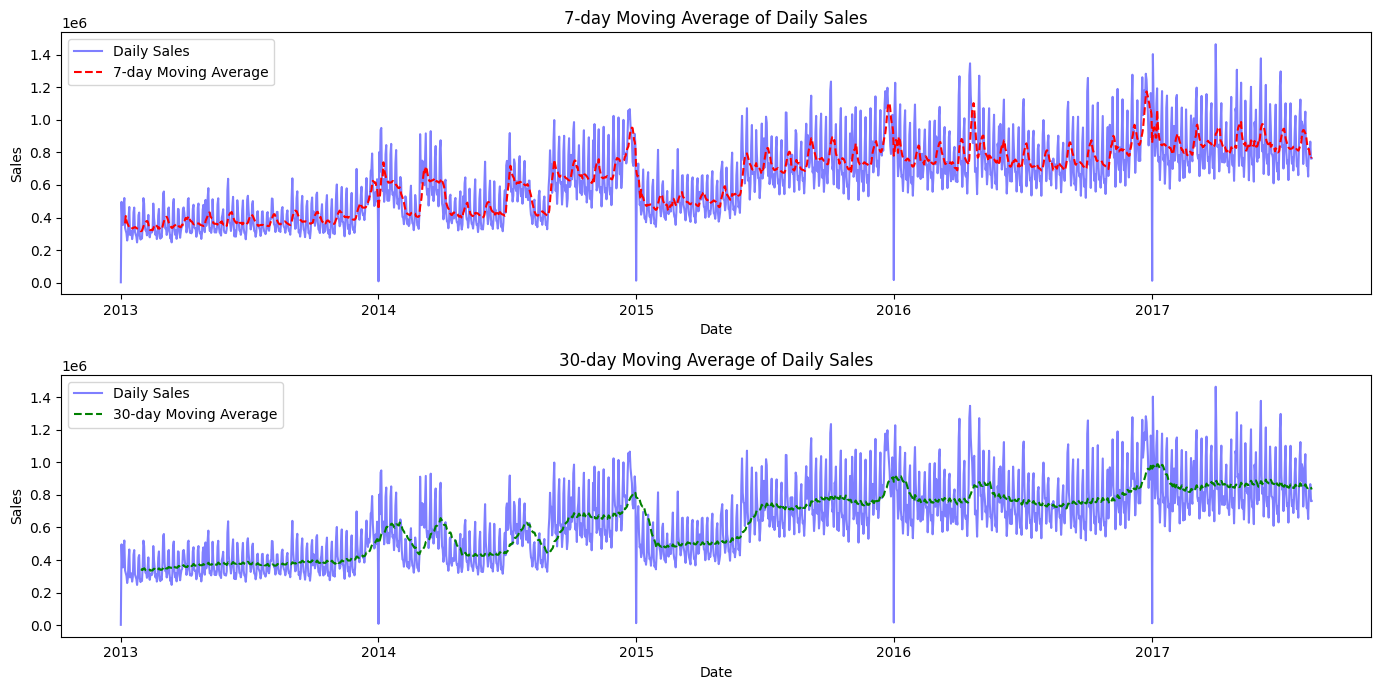

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the train data is loaded as train_data

# Convert the 'date' column to datetime format for easy plotting
train_data['date'] = pd.to_datetime(train_data['date'])

# Group by date and sum the sales for each day
daily_sales = train_data.groupby('date')['sales'].sum()

# Calculate short-term (7 days) and long-term (30 days) moving averages for daily sales
daily_sales_7_day_MA = daily_sales.rolling(window=7).mean()
daily_sales_30_day_MA = daily_sales.rolling(window=30).mean()

# Plot the results
plt.figure(figsize=(14, 7))

# Short-term moving average (7 days)
plt.subplot(2, 1, 1)
plt.plot(daily_sales.index, daily_sales, label='Daily Sales', color='blue', alpha=0.5)
plt.plot(daily_sales.index, daily_sales_7_day_MA, label='7-day Moving Average', color='red', linestyle='--')
plt.title('7-day Moving Average of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Long-term moving average (30 days)
plt.subplot(2, 1, 2)
plt.plot(daily_sales.index, daily_sales, label='Daily Sales', color='blue', alpha=0.5)
plt.plot(daily_sales.index, daily_sales_30_day_MA, label='30-day Moving Average', color='green', linestyle='--')
plt.title('30-day Moving Average of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


## regression plot

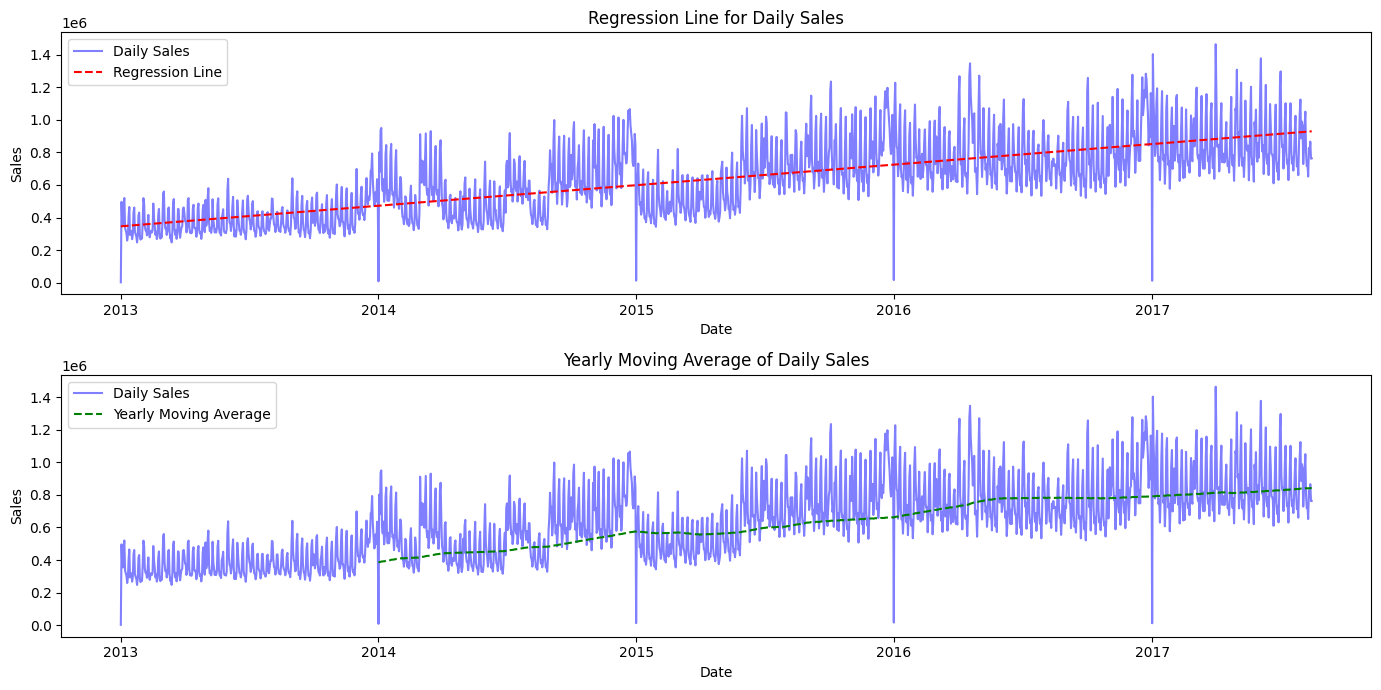

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming the train data is loaded as train_data

# Convert the 'date' column to datetime format for easy plotting
train_data['date'] = pd.to_datetime(train_data['date'])

# Group by date and sum the sales for each day
daily_sales = train_data.groupby('date')['sales'].sum()

# Calculate the yearly moving average for daily sales (365 days window)
daily_sales_yearly_MA = daily_sales.rolling(window=365).mean()

# Fit a regression line to the daily sales data
# We need the x and y values for the regression line
x = np.arange(len(daily_sales))  # Use the index as the x-value (which is the date)
y = daily_sales.values  # Daily sales as the y-value

# Perform linear regression using scipy stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Calculate the regression line
regression_line = slope * x + intercept

# Plot the results
plt.figure(figsize=(14, 7))

# Regression Line Plot
plt.subplot(2, 1, 1)
plt.plot(daily_sales.index, daily_sales, label='Daily Sales', color='blue', alpha=0.5)
plt.plot(daily_sales.index, regression_line, label='Regression Line', color='red', linestyle='--')
plt.title('Regression Line for Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Yearly Moving Average Plot
plt.subplot(2, 1, 2)
plt.plot(daily_sales.index, daily_sales, label='Daily Sales', color='blue', alpha=0.5)
plt.plot(daily_sales.index, daily_sales_yearly_MA, label='Yearly Moving Average', color='green', linestyle='--')
plt.title('Yearly Moving Average of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


## Lag features

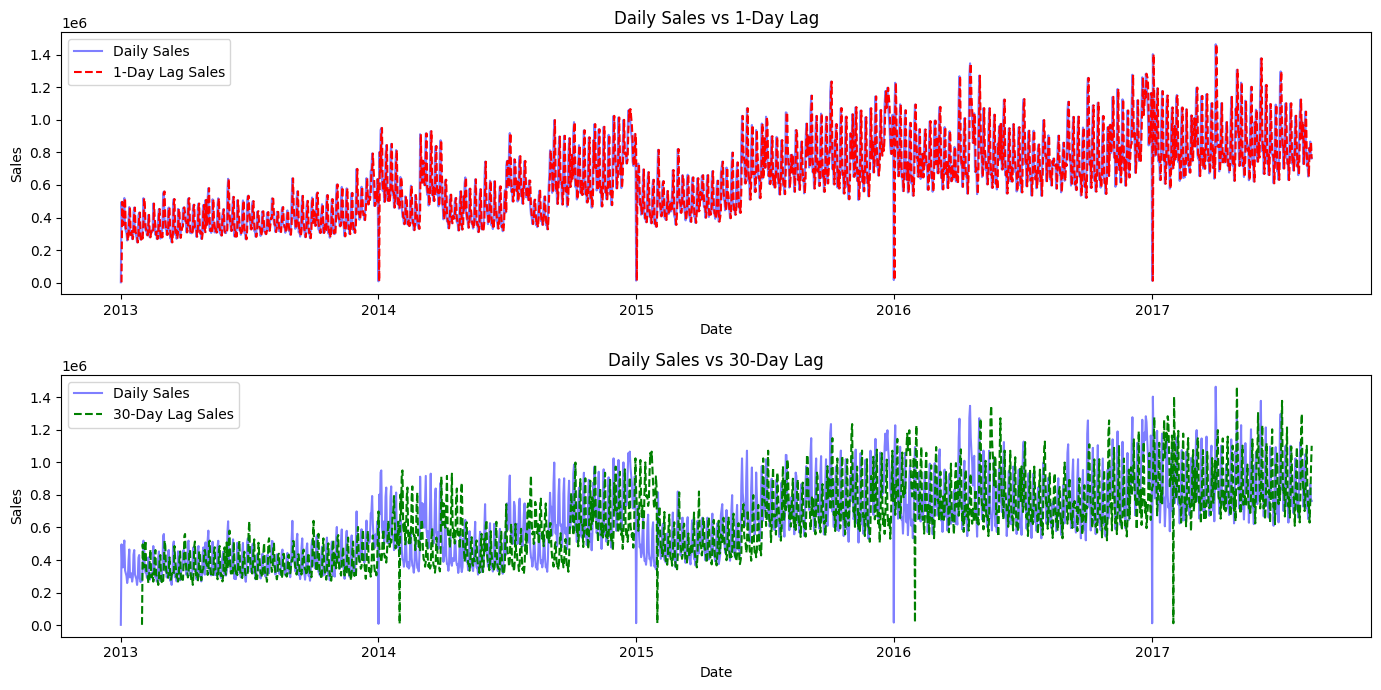

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format
train_data['date'] = pd.to_datetime(train_data['date'])

# Group by date and sum the sales for each day
daily_sales = train_data.groupby('date')['sales'].sum().reset_index()

# Create daily and monthly lag features
daily_sales['lag_1'] = daily_sales['sales'].shift(1)  # Previous day sales
daily_sales['lag_30'] = daily_sales['sales'].shift(30)  # Sales from 30 days ago (approx. one month)

# Plot Daily Lag Feature
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(daily_sales['date'], daily_sales['sales'], label='Daily Sales', color='blue', alpha=0.5)
plt.plot(daily_sales['date'], daily_sales['lag_1'], label='1-Day Lag Sales', color='red', linestyle='--')
plt.title('Daily Sales vs 1-Day Lag')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Plot Monthly Lag Feature
plt.subplot(2, 1, 2)
plt.plot(daily_sales['date'], daily_sales['sales'], label='Daily Sales', color='blue', alpha=0.5)
plt.plot(daily_sales['date'], daily_sales['lag_30'], label='30-Day Lag Sales', color='green', linestyle='--')
plt.title('Daily Sales vs 30-Day Lag')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

plt.tight_layout()
plt.show()


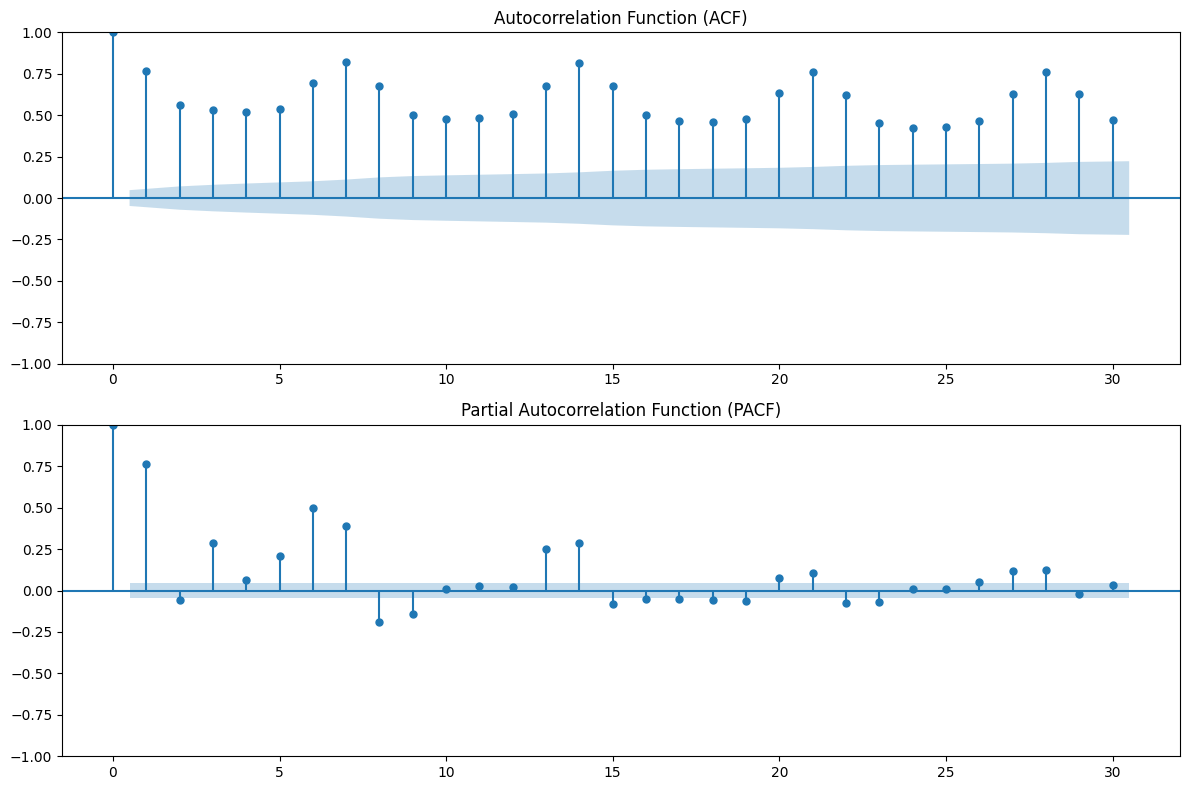

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Convert 'date' to datetime
train_data['date'] = pd.to_datetime(train_data['date'])

# Group by date and sum sales per day
daily_sales = train_data.groupby('date')['sales'].sum()

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF Plot
plot_acf(daily_sales, lags=30, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF Plot
plot_pacf(daily_sales, lags=30, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


## wave decomposition

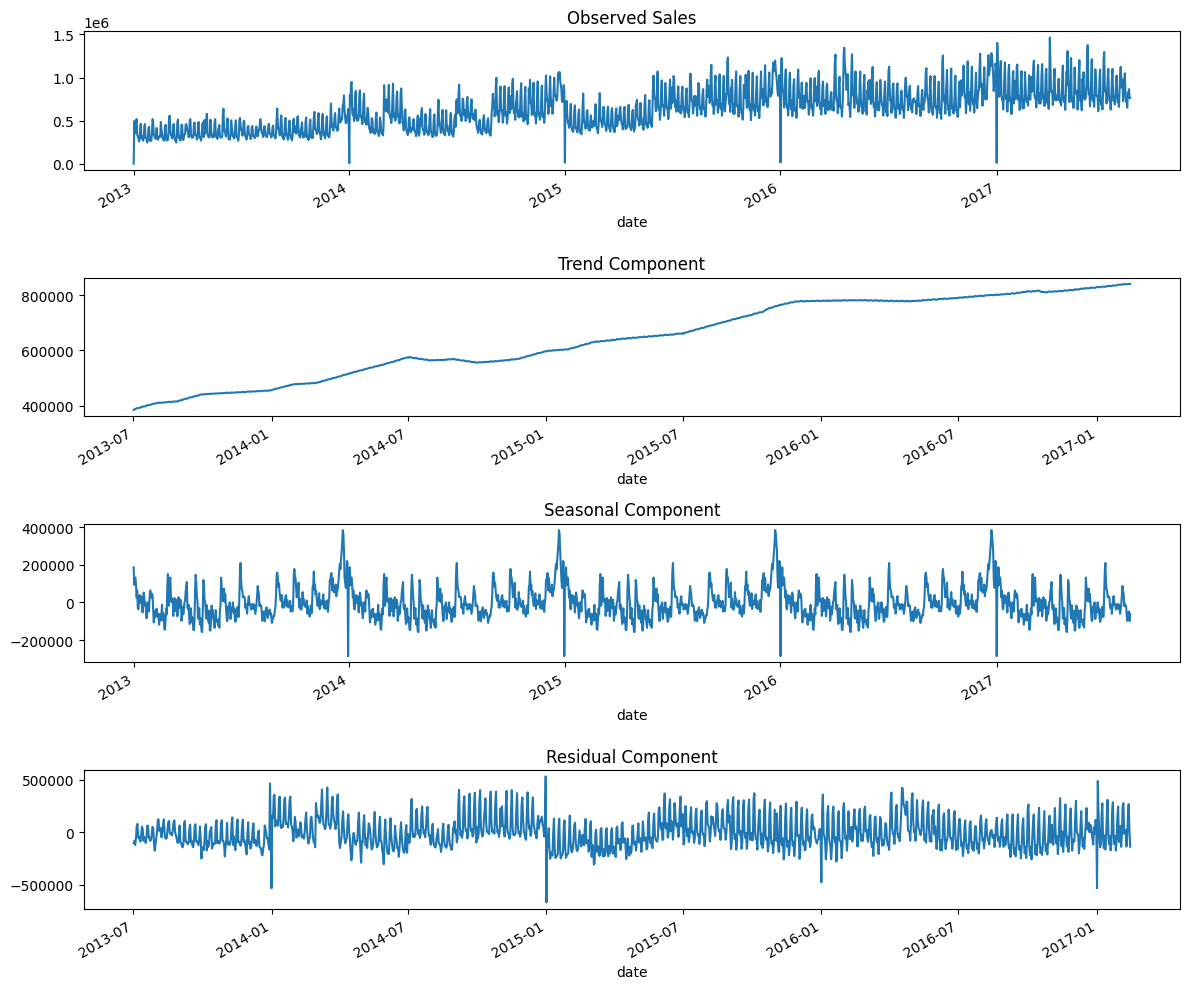

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'date' to datetime
train_data['date'] = pd.to_datetime(train_data['date'])

# Group by date and sum sales per day
daily_sales = train_data.groupby('date')['sales'].sum()

# Perform seasonal decomposition (assuming daily data, setting period=365 for yearly seasonality)
decomposition = seasonal_decompose(daily_sales, model='additive', period=365)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

decomposition.observed.plot(ax=axes[0], title="Observed Sales")
decomposition.trend.plot(ax=axes[1], title="Trend Component")
decomposition.seasonal.plot(ax=axes[2], title="Seasonal Component")
decomposition.resid.plot(ax=axes[3], title="Residual Component")

plt.tight_layout()
plt.show()


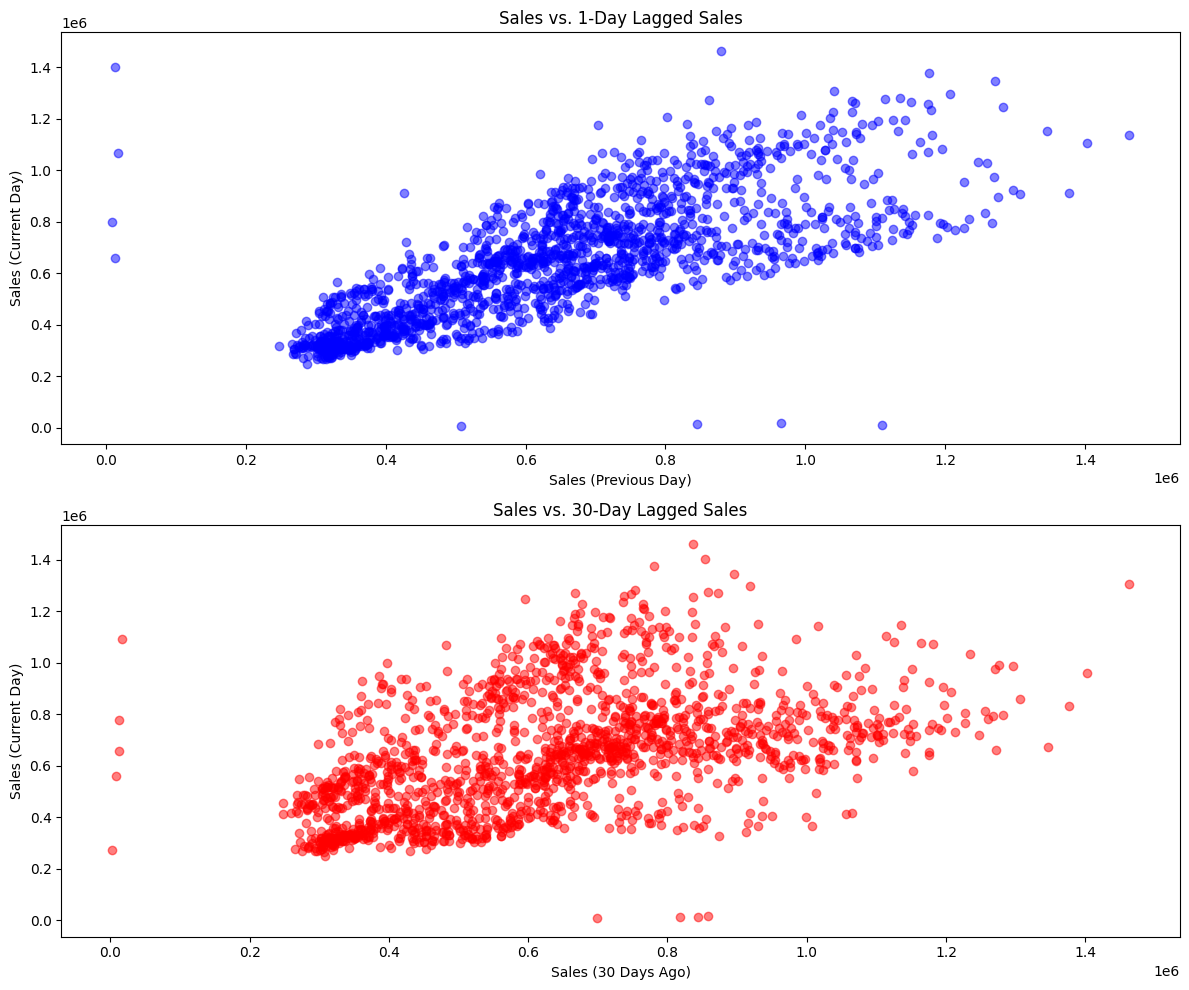

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' to datetime
train_data['date'] = pd.to_datetime(train_data['date'])

# Group by date and sum sales per day
daily_sales = train_data.groupby('date')['sales'].sum().reset_index()

# Create lag features
daily_sales['lag_1'] = daily_sales['sales'].shift(1)   # Previous day's sales
daily_sales['lag_30'] = daily_sales['sales'].shift(30) # Sales from 30 days ago

# Drop NaN values caused by shifting
daily_sales.dropna(inplace=True)

# Create plots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Scatter plot: Sales vs. 1-day lagged sales
axes[0].scatter(daily_sales['lag_1'], daily_sales['sales'], alpha=0.5, color='blue')
axes[0].set_title('Sales vs. 1-Day Lagged Sales')
axes[0].set_xlabel('Sales (Previous Day)')
axes[0].set_ylabel('Sales (Current Day)')

# Scatter plot: Sales vs. 30-day lagged sales
axes[1].scatter(daily_sales['lag_30'], daily_sales['sales'], alpha=0.5, color='red')
axes[1].set_title('Sales vs. 30-Day Lagged Sales')
axes[1].set_xlabel('Sales (30 Days Ago)')
axes[1].set_ylabel('Sales (Current Day)')

plt.tight_layout()
plt.show()


## analysing seasonality

In [13]:
import pandas as pd
import statsmodels.api as sm

# Convert 'date' to datetime
train_data['date'] = pd.to_datetime(train_data['date'])

# Aggregate daily sales
daily_sales = train_data.groupby('date')['sales'].sum().reset_index()

# Extract seasonal features
daily_sales['day_of_week'] = daily_sales['date'].dt.dayofweek  # Monday=0, Sunday=6
daily_sales['month'] = daily_sales['date'].dt.month  # 1=Jan, 12=Dec
daily_sales['year'] = daily_sales['date'].dt.year  # Extract year for trend analysis

# Create dummy variables for categorical features (one-hot encoding)
seasonal_features = pd.get_dummies(daily_sales[['day_of_week', 'month']], drop_first=True)

# Define target variable (Sales) and feature matrix (Seasonal Variables)
X = sm.add_constant(seasonal_features)  # Add constant for intercept
y = daily_sales['sales']

# Fit an Ordinary Least Squares (OLS) regression model
ols_model = sm.OLS(y, X).fit()

# Print summary of the regression model
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     118.5
Date:                Wed, 02 Apr 2025   Prob (F-statistic):           7.38e-49
Time:                        19:02:06   Log-Likelihood:                -23100.
No. Observations:                1684   AIC:                         4.621e+04
Df Residuals:                    1681   BIC:                         4.622e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.568e+05   1.38e+04     33.135      

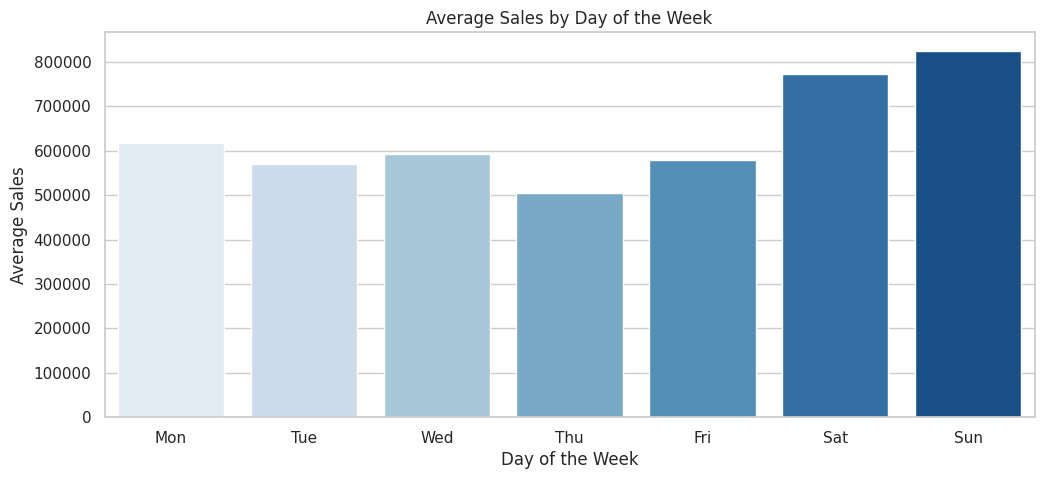

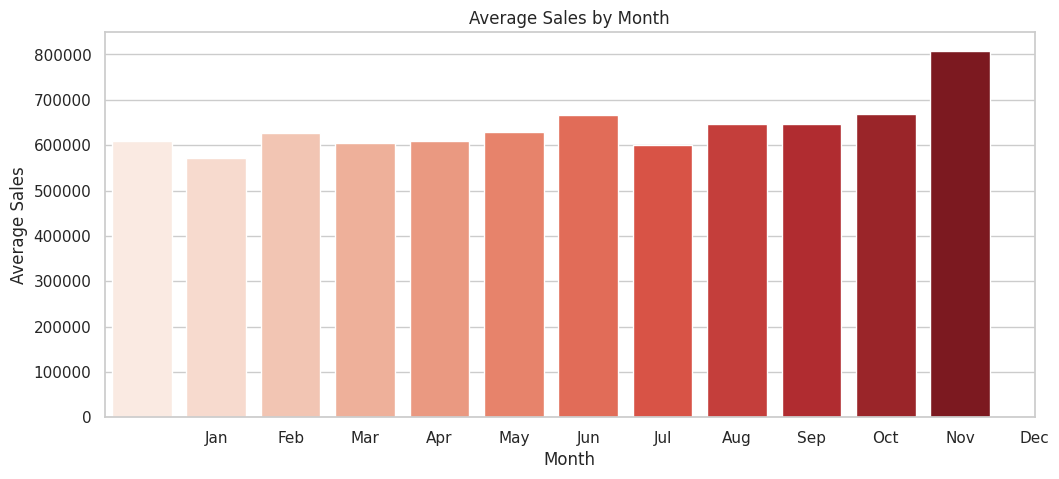

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' to datetime
train_data['date'] = pd.to_datetime(train_data['date'])

# Aggregate daily sales
daily_sales = train_data.groupby('date')['sales'].sum().reset_index()

# Extract seasonality features
daily_sales['day_of_week'] = daily_sales['date'].dt.dayofweek  # Monday=0, Sunday=6
daily_sales['month'] = daily_sales['date'].dt.month  # 1=Jan, 12=Dec

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Plot Sales by Day of the Week
plt.figure(figsize=(12, 5))
sns.barplot(x=daily_sales.groupby('day_of_week')['sales'].mean().index,  
            y=daily_sales.groupby('day_of_week')['sales'].mean().values,  
            palette="Blues")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.title("Average Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Sales")
plt.show()

# Plot Sales by Month
plt.figure(figsize=(12, 5))
sns.barplot(x=daily_sales.groupby('month')['sales'].mean().index,  
            y=daily_sales.groupby('month')['sales'].mean().values,  
            palette="Reds")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()


In [15]:
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [16]:
import pandas as pd

# Convert 'date' to datetime
train_data['date'] = pd.to_datetime(train_data['date'])

# Create daily sales dataframe
daily_train = train_data.groupby('date')['sales'].sum().reset_index()

# Set date as index
daily_train.set_index('date', inplace=True)

# Create lag feature (previous day's sales)
daily_train['sales_lag_1'] = daily_train['sales'].shift(1)

# Fill missing values with 0
daily_train.fillna(0, inplace=True)

# Create a time dummy feature (e.g., linear trend)
daily_train['time_dummy'] = range(len(daily_train))

# Display first rows
print(daily_train.head())


                    sales    sales_lag_1  time_dummy
date                                                
2013-01-01    2511.618999       0.000000           0
2013-01-02  496092.417944    2511.618999           1
2013-01-03  361461.231124  496092.417944           2
2013-01-04  354459.677093  361461.231124           3
2013-01-05  477350.121229  354459.677093           4


In [17]:
import statsmodels.api as sm

# Define independent variables (features)
X = daily_train[['sales_lag_1', 'time_dummy']]
X = sm.add_constant(X)  # Add intercept term

# Define dependent variable (target)
y = daily_train['sales']

# Fit OLS regression model
ols_model = sm.OLS(y, X).fit()

# Print summary of the regression
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     1540.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:02:07   Log-Likelihood:                -22335.
No. Observations:                1684   AIC:                         4.468e+04
Df Residuals:                    1681   BIC:                         4.469e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.671e+05   9879.314     16.915      

<ipython-input-18-82d86bcdaf54>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_train['sales_7d_MA'].fillna(0, inplace=True)


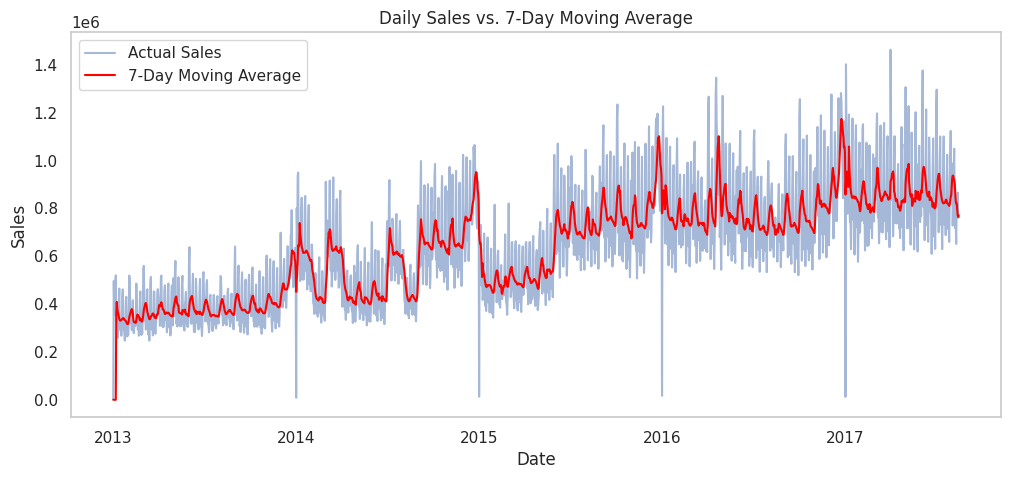

In [18]:
import matplotlib.pyplot as plt

# Create 7-day moving average
daily_train['sales_7d_MA'] = daily_train['sales'].rolling(window=7).mean()

# Fill NaN values at the beginning
daily_train['sales_7d_MA'].fillna(0, inplace=True)

# Plot actual sales vs. weekly moving average
plt.figure(figsize=(12, 5))
plt.plot(daily_train.index, daily_train['sales'], label='Actual Sales', alpha=0.5)
plt.plot(daily_train.index, daily_train['sales_7d_MA'], label='7-Day Moving Average', color='red')

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Daily Sales vs. 7-Day Moving Average")
plt.legend()
plt.grid()
plt.show()


In [19]:
daily_train

,sales,sales_lag_1,time_dummy,sales_7d_MA
date,,,,
2013-01-01,2511.618999,0.000000,0,0.000000
2013-01-02,496092.417944,2511.618999,1,0.000000
2013-01-03,361461.231124,496092.417944,2,0.000000
2013-01-04,354459.677093,361461.231124,3,0.000000
2013-01-05,477350.121229,354459.677093,4,0.000000
...,...,...,...,...
2017-08-11,826373.722022,651386.911970,1679,820340.633670
2017-08-12,792630.535079,826373.722022,1680,795617.331469
2017-08-13,865639.677471,792630.535079,1681,769343.119068


In [20]:
import statsmodels.api as sm

# Define independent variables (features)
X = daily_train[['sales_lag_1', 'time_dummy', 'sales_7d_MA']]
X = sm.add_constant(X)  # Add intercept term

# Define dependent variable (target)
y = daily_train['sales']

# Fit OLS regression model
ols_model_ma = sm.OLS(y, X).fit()

# Print summary of the regression
print(ols_model_ma.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1207.
Date:                Wed, 02 Apr 2025   Prob (F-statistic):               0.00
Time:                        19:02:07   Log-Likelihood:                -22244.
No. Observations:                1684   AIC:                         4.450e+04
Df Residuals:                    1680   BIC:                         4.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          3.6e+04   1.33e+04      2.703      

<ipython-input-21-bc5448827e6a>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/

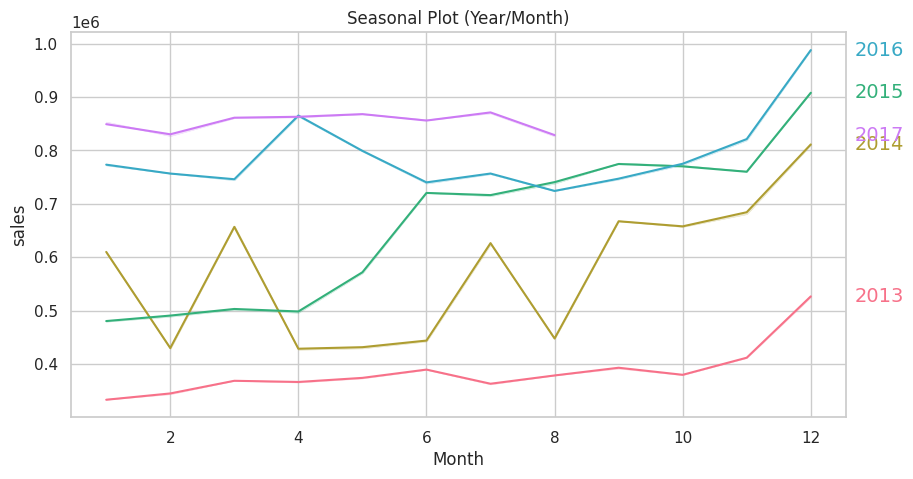

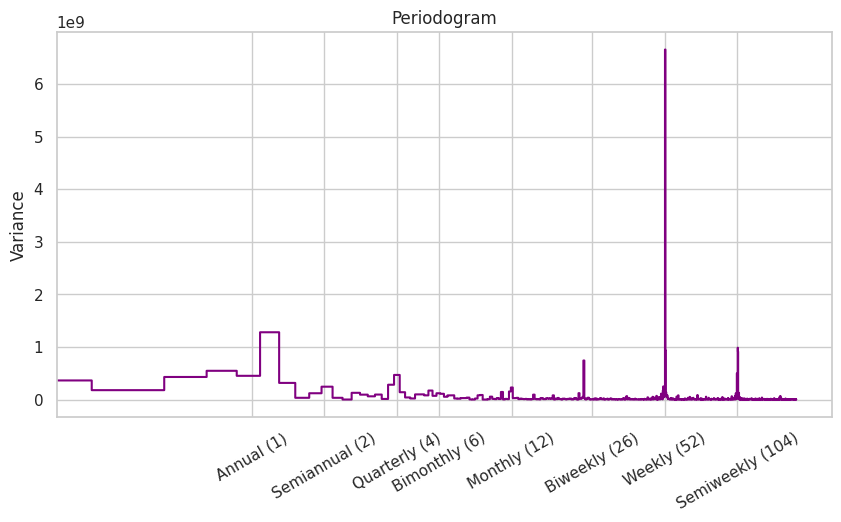

In [21]:
from scipy.signal import periodogram
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure date is in period format for consistency
daily_train.index = daily_train.index.to_period("D")

# Seasonal Plot Function
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique())
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

# Periodogram Function
def plot_periodogram(ts, detrend='linear', ax=None):
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")  # Frequency scaling
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

# Create Seasonal Plot
daily_train['Year'] = daily_train.index.year
daily_train['Month'] = daily_train.index.month
fig, ax = plt.subplots(figsize=(10, 5))
seasonal_plot(daily_train, "sales", period="Year", freq="Month", ax=ax)

# Create Periodogram
fig, ax = plt.subplots(figsize=(10, 5))
plot_periodogram(daily_train['sales'], ax=ax)

plt.show()


<ipython-input-22-16cdfe97f95f>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/

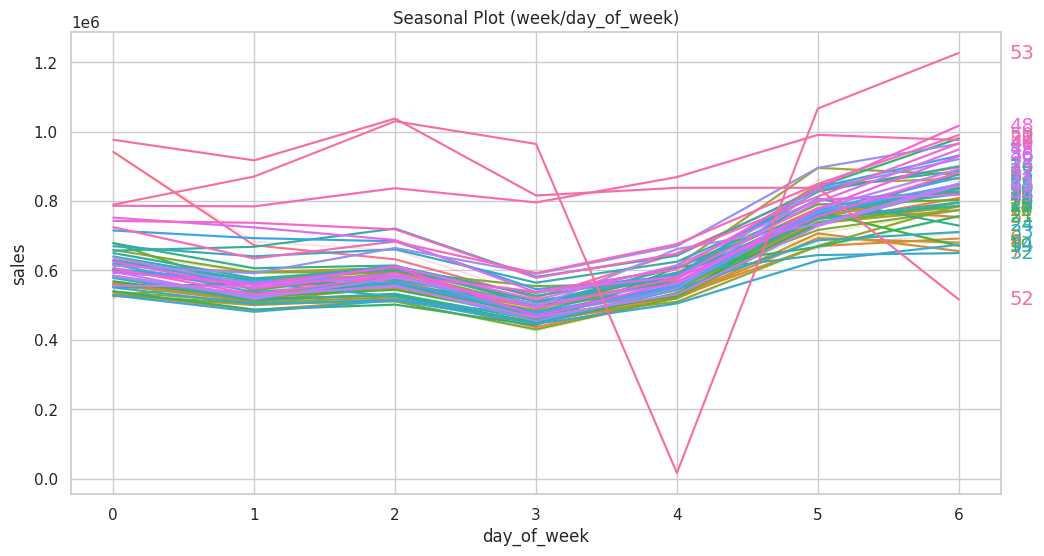

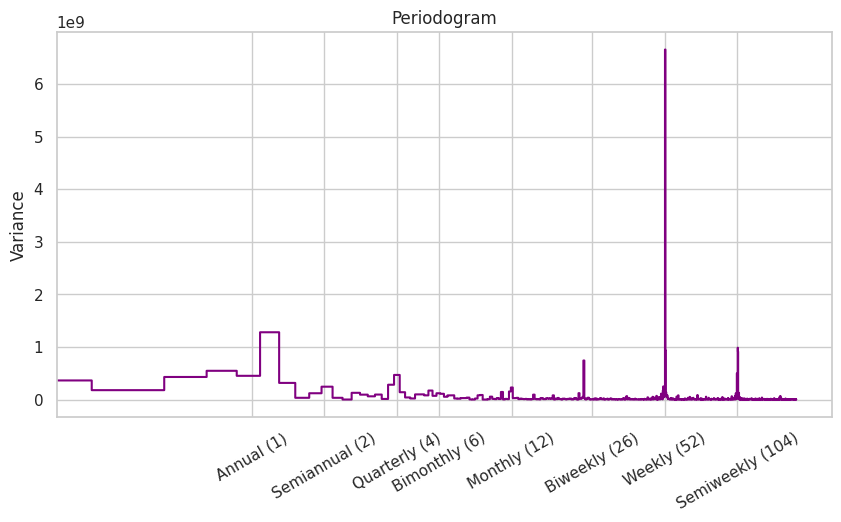

In [22]:
from scipy.signal import periodogram
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'daily_train' already has a PeriodIndex, skip conversion
# Create 'week' and 'day_of_week' features based on the 'PeriodIndex'
daily_train['week'] = daily_train.index.week  # Extracting the week from the PeriodIndex
daily_train['day_of_week'] = daily_train.index.dayofweek  # Monday = 0, Sunday = 6

# Seasonal Plot Function
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique())
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

# Periodogram Function
def plot_periodogram(ts, detrend='linear', ax=None):
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")  # Frequency scaling
    frequencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(frequencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

# Seasonal Plot: Weekly sales patterns
fig, ax = plt.subplots(figsize=(12, 6))
seasonal_plot(daily_train, "sales", period="week", freq="day_of_week", ax=ax)

# Create Periodogram: Frequency components of sales data
fig, ax = plt.subplots(figsize=(10, 5))
plot_periodogram(daily_train['sales'], ax=ax)

plt.show()


In [23]:
train_data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


# EDA

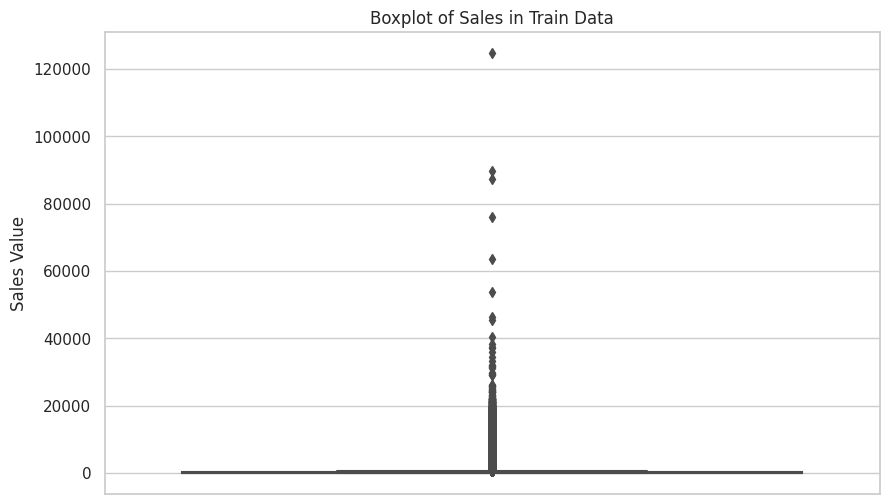

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(10, 6))

# Create a boxplot for sales in train_data
sns.boxplot(y=train_data['sales'])

# Set title and labels
plt.title("Boxplot of Sales in Train Data")
plt.ylabel("Sales Value")

# Show the plot
plt.show()


In [25]:
# Merge train_data with stores_data on 'store_nbr'
train_data = train_data.merge(stores_data, on='store_nbr', how='left')

# Display the first few rows to verify the merge
print(train_data.head())


   id       date  store_nbr      family  sales  onpromotion   city      state  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  Quito  Pichincha   
1   1 2013-01-01          1   BABY CARE    0.0            0  Quito  Pichincha   
2   2 2013-01-01          1      BEAUTY    0.0            0  Quito  Pichincha   
3   3 2013-01-01          1   BEVERAGES    0.0            0  Quito  Pichincha   
4   4 2013-01-01          1       BOOKS    0.0            0  Quito  Pichincha   

  type  cluster  
0    D       13  
1    D       13  
2    D       13  
3    D       13  
4    D       13  


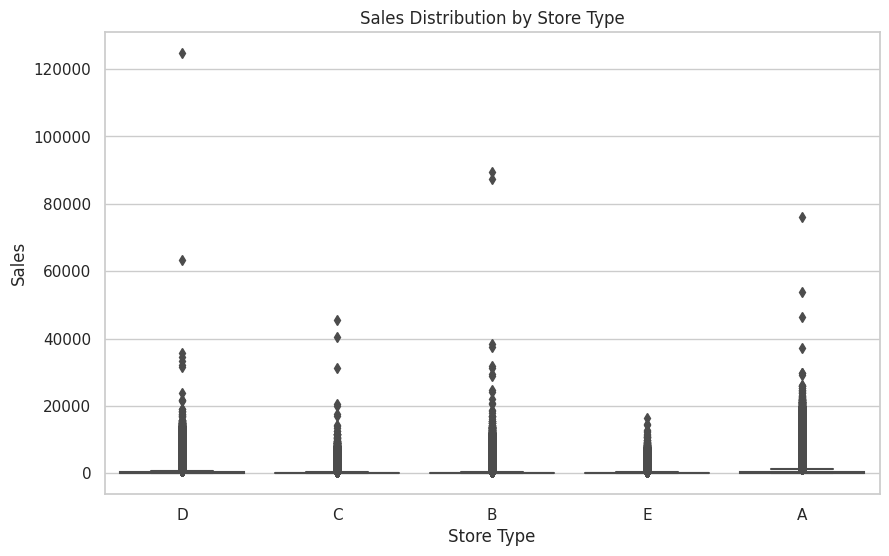

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(10, 6))

# Create a box plot of sales based on store type
sns.boxplot(x="type", y="sales", data=train_data)

# Set plot title and labels
plt.title("Sales Distribution by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Sales")

# Show the plot
plt.show()


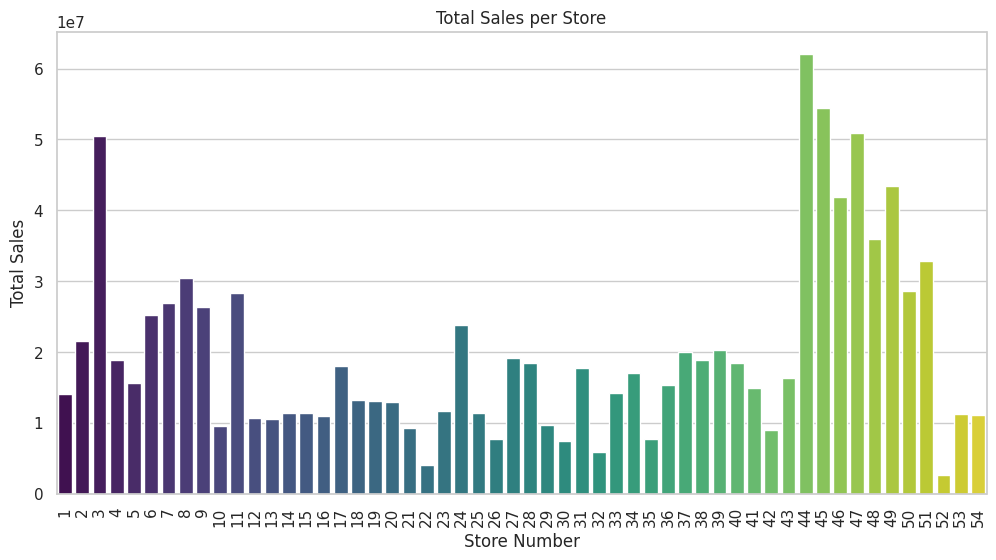

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sales by store number
store_sales = train_data.groupby("store_nbr")["sales"].sum().reset_index()

# Set plot size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x="store_nbr", y="sales", data=store_sales, palette="viridis")

# Set plot title and labels
plt.title("Total Sales per Store")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)  # Rotate store numbers for readability

# Show the plot
plt.show()


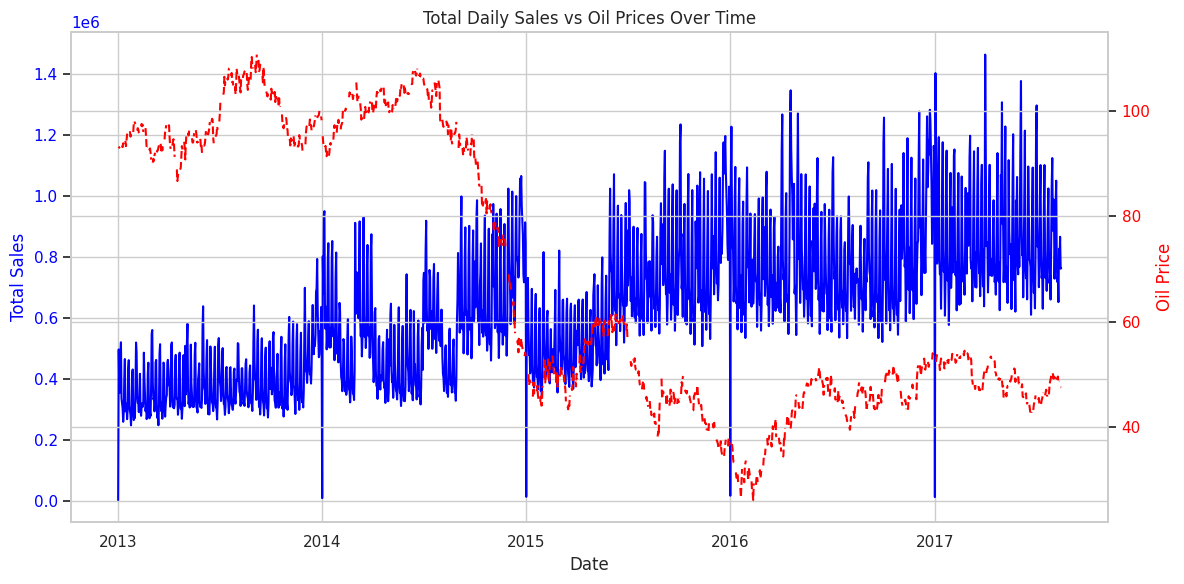

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert date columns to datetime format
train_data["date"] = pd.to_datetime(train_data["date"])
oil_data["date"] = pd.to_datetime(oil_data["date"])

# Aggregate total daily sales
daily_sales = train_data.groupby("date")["sales"].sum().reset_index()

# Merge with oil prices
merged_data = daily_sales.merge(oil_data, on="date", how="left")

# Plot sales and oil prices
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total sales on primary y-axis
ax1.set_xlabel("Date")
ax1.set_ylabel("Total Sales", color="blue")
ax1.plot(merged_data["date"], merged_data["sales"], label="Total Sales", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create secondary y-axis for oil prices
ax2 = ax1.twinx()
ax2.set_ylabel("Oil Price", color="red")
ax2.plot(merged_data["date"], merged_data["dcoilwtico"], label="Oil Price", color="red", linestyle="dashed")
ax2.tick_params(axis="y", labelcolor="red")

# Title and legend
plt.title("Total Daily Sales vs Oil Prices Over Time")
fig.tight_layout()
plt.show()


In [29]:
import pandas as pd

# Convert date columns to datetime
train_data["date"] = pd.to_datetime(train_data["date"])
oil_data["date"] = pd.to_datetime(oil_data["date"])

# Merge train_data with oil_data
merged_train = train_data.merge(oil_data, on="date", how="left")

# Compute correlation between sales and oil price
correlation = merged_train[["sales", "dcoilwtico"]].corr()

print("Correlation between Sales and Oil Price:")
print(correlation)


Correlation between Sales and Oil Price:
              sales  dcoilwtico
sales       1.00000    -0.07905
dcoilwtico -0.07905     1.00000


In [30]:
train_data

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


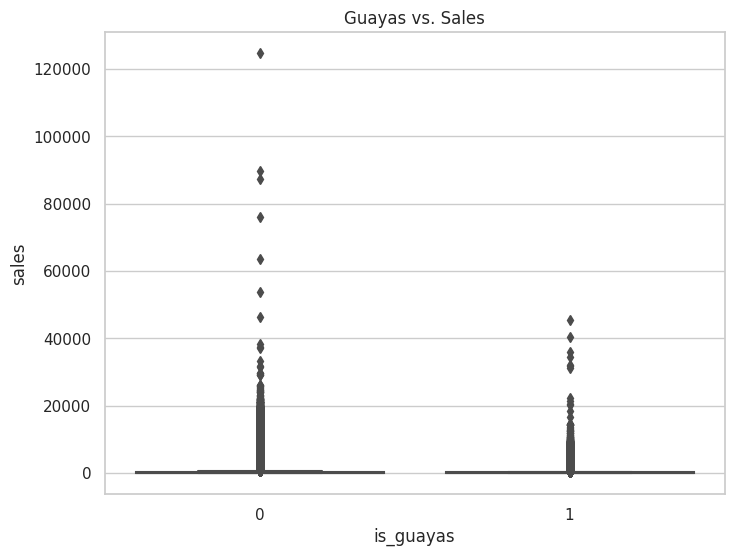

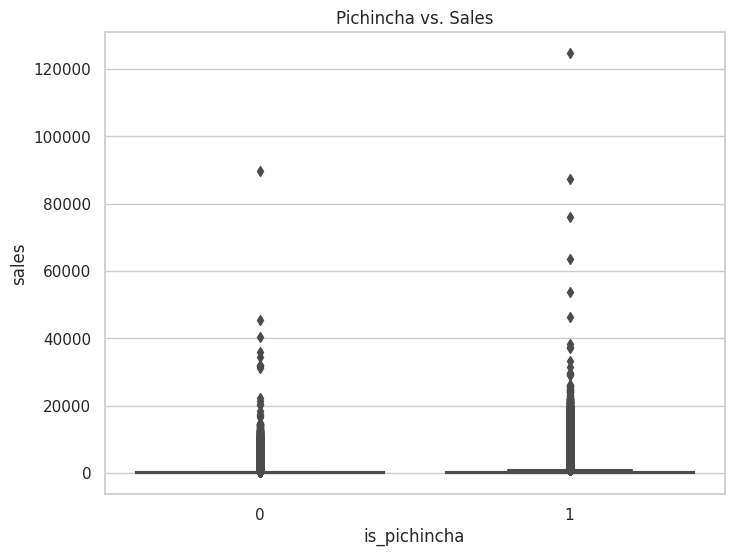

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create new columns for 'Guayas' and 'Pichincha'
train_data['is_guayas'] = train_data['state'].apply(lambda x: 1 if x == 'Guayas' else 0)
train_data['is_pichincha'] = train_data['state'].apply(lambda x: 1 if x == 'Pichincha' else 0)

# Boxplot for 'is_guayas' vs. 'sales'
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_guayas', y='sales', data=train_data)
plt.title('Guayas vs. Sales')
plt.show()

# Boxplot for 'is_pichincha' vs. 'sales'
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_pichincha', y='sales', data=train_data)
plt.title('Pichincha vs. Sales')
plt.show()


# Modeling

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 2400710, number of used features: 4
[LightGBM] [Info] Start training from score 357.301279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

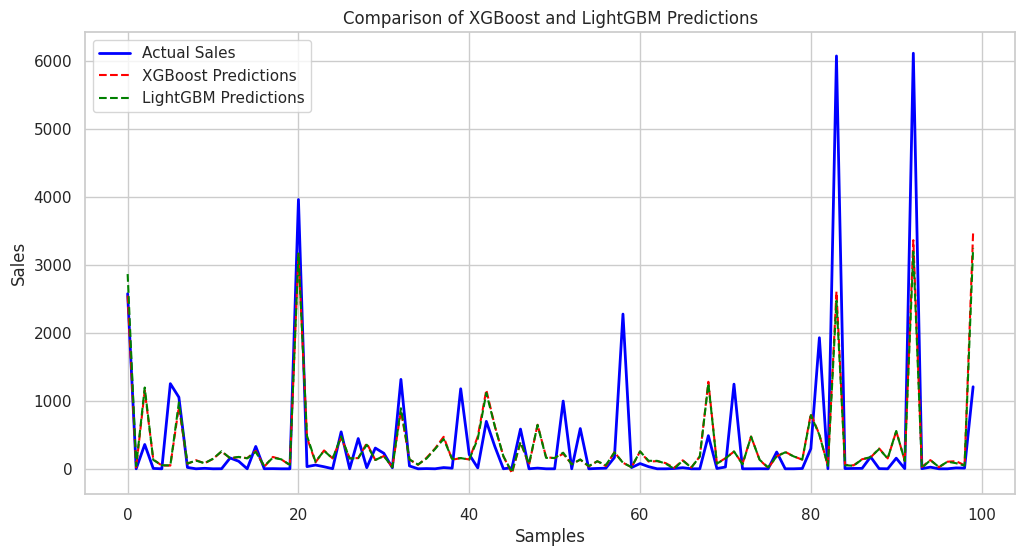

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


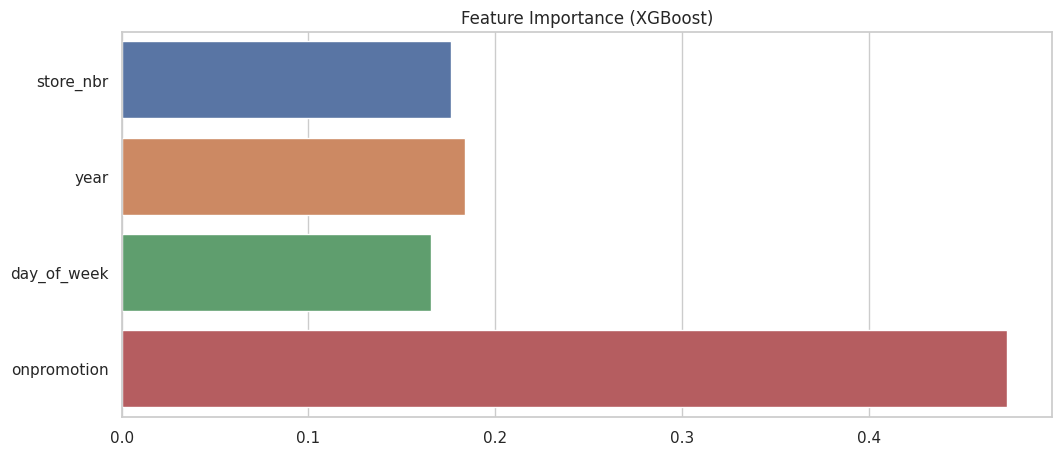

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date to datetime format
train_data['date'] = pd.to_datetime(train_data['date'])

# Extract time-based features
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['day'] = train_data['date'].dt.day
train_data['day_of_week'] = train_data['date'].dt.dayofweek

# Feature Selection (Removed oil price)
features = ['store_nbr', 'year', 'day_of_week', 'onpromotion']
target = 'sales'

X = train_data[features]
y = train_data[target]

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model with fixed parameters
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror', 
    learning_rate=0.1, 
    max_depth=5, 
    n_estimators=200,
    random_state=42
)

# Train XGBoost
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)

# LightGBM Model with fixed parameters
lgb_reg = lgb.LGBMRegressor(
    objective='regression', 
    learning_rate=0.1, 
    max_depth=5, 
    n_estimators=200,
    random_state=42
)

# Train LightGBM
lgb_reg.fit(X_train, y_train)
y_pred_lgb = lgb_reg.predict(X_test)

# Evaluate models using RMSE
xgboost_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
lgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print(f"XGBoost RMSE: {xgboost_rmse:.2f}")
print(f"LightGBM RMSE: {lgb_rmse:.2f}")
# Plot actual vs predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual Sales', color='blue', linewidth=2)
plt.plot(y_pred_xgb[:100], label='XGBoost Predictions', color='red', linestyle='--')
plt.plot(y_pred_lgb[:100], label='LightGBM Predictions', color='green', linestyle='--')
plt.legend()
plt.title('Comparison of XGBoost and LightGBM Predictions')
plt.xlabel('Samples')
plt.ylabel('Sales')
plt.show()

# Feature Importance (XGBoost)
plt.figure(figsize=(12, 5))
sns.barplot(x=xg_reg.feature_importances_, y=features)
plt.title('Feature Importance (XGBoost)')
plt.show()


In [36]:
# Convert test date to datetime and extract the same time-based features
test_data['date'] = pd.to_datetime(test_data['date'])
test_data['year'] = test_data['date'].dt.year
test_data['month'] = test_data['date'].dt.month
test_data['day'] = test_data['date'].dt.day
test_data['day_of_week'] = test_data['date'].dt.dayofweek

# Ensure test data has the same features as training data
X_test_final = test_data[features]

# Predict using both models
y_pred_xgb_test = xg_reg.predict(X_test_final)
y_pred_lgb_test = lgb_reg.predict(X_test_final)

# Average the predictions (ensemble method)
test_data['sales'] = (y_pred_xgb_test + y_pred_lgb_test) / 2

# Prepare submission file
submission = test_data[['id', 'sales']]
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' is created successfully!")


Submission file 'submission.csv' is created successfully!


,id,date,store_nbr,family,onpromotion,year,month,day,day_of_week,sales
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16,2,25.291790
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16,2,25.291790
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16,2,34.125030
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16,2,1340.954418
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16,2,25.291790
...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,2017,8,31,3,216.062436
28508,3029396,2017-08-31,9,PREPARED FOODS,0,2017,8,31,3,72.329240
28509,3029397,2017-08-31,9,PRODUCE,1,2017,8,31,3,216.062436
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,2017,8,31,3,802.314077
